In [73]:
with open('input.txt') as file:
    data = file.read()

In [81]:
import numpy as np
from scipy.stats import poisson

keyword = 'thus'

documents = data.split('\n\n')
documents = [document.replace('\n', ' ') for document in documents]
words = [word for document in documents for word in document.lower().split(' ')]

mean_occurrence = sum([word == keyword for word in words]) / len(words)
document_occurrence = [sum([word == keyword for word in document.lower().split(' ')]) for document in documents]

poisson_pmf = poisson(mu=mean_occurrence)
poisson_data = [poisson_pmf.pmf(k) for k in range(max(document_occurrence))]

empirical_data = [sum(np.array(document_occurrence)==k) / len(document_occurrence) for k in range(max(document_occurrence))]
print(poisson_data)
print(empirical_data)

[0.9992946753209372, 0.0007050758791095665]
[0.9813071171420659, 0.01758515646635281]


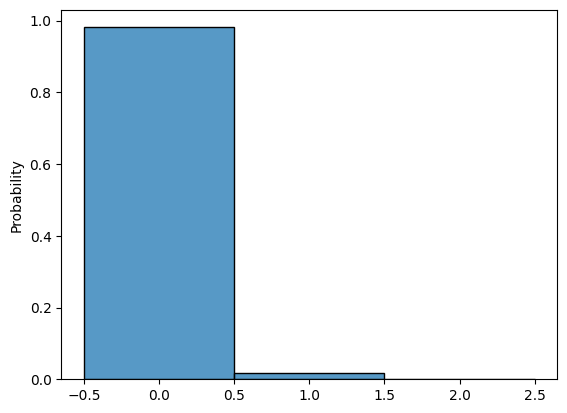

In [82]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(data=document_occurrence, stat='probability', discrete=True)
plt.show()